<h2> Video Games Sales Analysis</h2>
<h3> This data set contains information about video games sales for many years with details about their publishing company and genre with their sales of course we will take a look at their sales and based on this historical data we will decide if a future investment in video games industry is safe or  risky</h3>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sales=pd.read_csv(r'C:\Users\DELL\Desktop\Statistics\KAGGLE\fly\book\video_games_sales.csv')
sales.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


<h3> Cleaning the dataset  </h3>

In [8]:
# we will first see how many rows and columns we have
sales.shape

(16719, 16)

<b>a) Altering the names of columns :</b>

In [9]:
# now we check the names of columns to see if some names need to be altered
sales.columns


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [10]:
# we will alter some columns names
d={'Name':'Game_Name','NA_Sales':'North_America_Sales','JP_Sales':'Japan_Sales','EU_Sales':'Europe_Sales'}
sales=sales.rename(columns=d)
sales

,Game_Name,Platform,Year_of_Release,Genre,Publisher,North_America_Sales,Europe_Sales,Japan_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


<b>b) Checking for null values in columns :</b>

In [11]:
# now we build a function that plots a bar chart showing the percentage of null values in each column
# we might consider dropping columns with null values more than 40% 
# the param df can be any possible dataframe
# the function plots the percentage of null values in each column of the input dataframe using a bar chart
def null_per_bar(df):
    s=np.round(np.divide(df.isna().sum(),df.shape[0]),2).sort_values(ascending=False)
    ss=np.linspace(0,100,df.columns.shape[0])
    sns.barplot(y=s.index,x=s.values)
    plt.ylabel('column name',fontweight='bold')
    plt.xlabel('null percentage',fontweight='bold')
    plt.title('Null percentage in each column barchart',fontweight='bold')
    sns.set_style('darkgrid')
    plt.show()
    


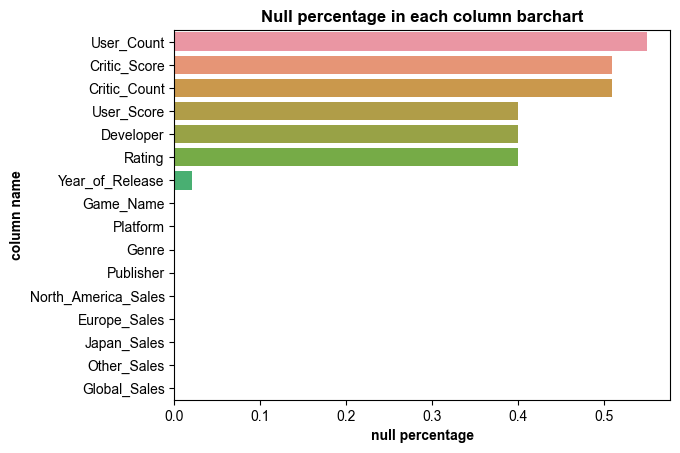

In [12]:
null_per_bar(sales)

from the bar chart above we can see that the percentage of null values in columns rating developer user score critic columns
and user count are all equal or above 40% so we will drop them from the dataset

In [13]:
# so we delete all columns that have percentage of nans above 40%
l=np.round(np.divide(sales.isna().sum(),sales.shape[0]),2)
cols=l[l>=0.4].index
sales=sales.drop(cols,axis=1)
sales



,Game_Name,Platform,Year_of_Release,Genre,Publisher,North_America_Sales,Europe_Sales,Japan_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


<b>c)Fixing the data types of columns :</b>

In [14]:
# checking the dtypes of all columns to seeif they are true
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Game_Name            16717 non-null  object 
 1   Platform             16719 non-null  object 
 2   Year_of_Release      16450 non-null  float64
 3   Genre                16717 non-null  object 
 4   Publisher            16665 non-null  object 
 5   North_America_Sales  16719 non-null  float64
 6   Europe_Sales         16719 non-null  float64
 7   Japan_Sales          16719 non-null  float64
 8   Other_Sales          16719 non-null  float64
 9   Global_Sales         16719 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [15]:
# sales columns will be kept as float but we convert object columns to string
lisa=['Genre','Publisher','Game_Name']
for i in lisa:
    sales[i]=sales[i].astype('str')




<b>d) Checking for empty strings in string columns :</b>

In [16]:
# does the genre  Publisher Game_Name columns contain any empty strings?
for i in lisa:
    if sales[i].apply(lambda x:x.isspace()).any():
#      print(i,' column contains empty strings cells')
        print(i,' column contains empty string cells')
    else:
        print(i,' column does not contain any empty cells')
    
    

Genre  column does not contain any empty cells
Publisher  column does not contain any empty cells
Game_Name  column does not contain any empty cells


<b>e) Checking that all sales values are positive (above zero) :</b>

In [17]:
sala=sales[sales.columns[-5:]]
(sala>=0).all()

North_America_Sales    True
Europe_Sales           True
Japan_Sales            True
Other_Sales            True
Global_Sales           True
dtype: bool

<b>f)Checking for duplicated rows :</b>

In [18]:
sales.duplicated().any()

False

<b>g) Deleting the records that contains nan values:</b>

In [19]:
sales=sales.dropna()

In [20]:
# now we will explore the dataset to look analyse sales overthe years


<b>Sales Analysis :</b>

<b>a) How does the values of sales change over the years ?</b>
* were they increasing  ? at which time range?
* were they decreasing at which time range did they decrease?
* when did the sales reach the climax value ? at which year?
* when did the sales reach the lowest? at which year
* what are the years that can be considered the golden era for games sales?

In [21]:
# first we will calculate the total sales of each game
sales['Total_Sales']=sales[sales.columns[-5:]].sum(axis=1)
sales


C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Game_Name,Platform,Year_of_Release,Genre,Publisher,North_America_Sales,Europe_Sales,Japan_Sales,Other_Sales,Global_Sales,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,165.07
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80.48
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,71.04
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,65.54
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,62.75
...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,0.02
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,0.02
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,0.02
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,0.02


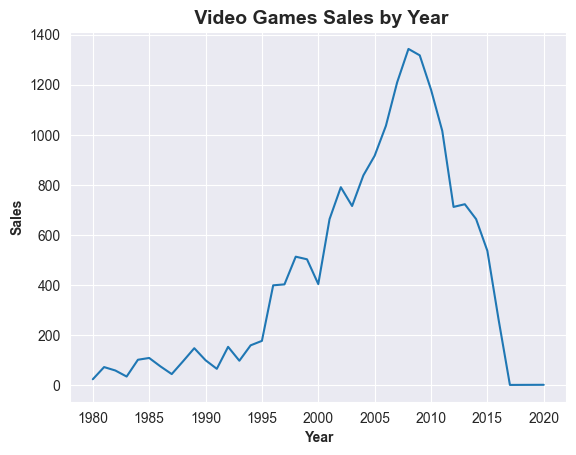

In [22]:
# now we plot the line chart that demonstrates how sales values change over the years
el=sales.groupby('Year_of_Release')['Total_Sales'].sum()
sns.lineplot(x=el.index,y=el.values)
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Sales',fontweight='bold')
plt.title(' Video Games Sales by Year',fontweight='bold',fontsize=14)
plt.show()

from the line chart above we can see that the trend  was upward and sales were increasing between year 1980 to 2008
* they started to decrease after 2009 and their values has fallen sharply in the following years after 2009
* so the trend becomes downward after 2009 and their values were very low at the end year of the study(the second worst
                                                                                                      sales value in the history of this dataset)
* the sales reach the climax in 2008 and the worst sales were in 2017
*we can say that the time range between 2004 and 2011 can be considered the golden era for video games sales were 
sales values were very high 
* so we can see that the state of market was not really promising around and after 2020 with with very low sales values

In [23]:
# now we must take alook at the golden age years from 2005 to 2011 to see what were the top ten sales games
# what were the publishing companies with highest sales
# what was the genres of games that have the higher sales at that year
# we will build functions that allow us to get  sales statistics about any specific year

In [24]:
# now we build functions to make information extraction about each year simpler.
# the first function takes the number of year as parameter and gives us basic info about this year
# the basic info includes publisers ,games ,genres and platforms with best sales in the specified year
def year_statistic(year):
    best_10=sales.loc[sales['Year_of_Release']==year]
    #  10 games with best sales names 
    v1=best_10.groupby('Game_Name')['Total_Sales'].sum().sort_values(ascending=False).head(10)
    # top 7 plafroms with best sales
    v2=best_10.groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False).head(7)
    # top 7 publishers with best sales
    v3=best_10.groupby('Publisher')['Total_Sales'].sum().sort_values(ascending=False).head(7)
    # total video games sales in this year for all companies and games and platfroms
    #total=pd.DataFrame(best_10['Total_Sales'].sum())
    # sales of each genre
    v4=best_10.groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False).head(5)
    d={}
    #d['Year']=year
    d['Names']=v1
    d['Platforms']=v2
    d['Publishers']=v3
    d['Genre']=v4
    #d['Total']=total
    return d

In [25]:
# second function here creates the  visualizations for statistics made by former function it has one param the year
def visualize(year):
    d=year_statistic(year)
    
    fig=plt.figure()
    titles=['top ten best sales games in '+str(year),'Top 7 video platfroms with largest sales in '+str(year),
           'Top 7 video games publishers with best sales in '+str(year),'Video game sales for Top 5 genre in '+str(year)]
    for i,value in enumerate(d.keys()):
        plt.subplot(2,2,i+1)
        if i==2:
            plt.barh(y=d[value].index,width=d[value].values,color=['#57E964','#32CD32','#AAF0D1','#FAAFBA','#F8B88B','#08A04B','#93FFE8'])
        else:
            plt.barh(y=d[value].index,width=d[value].values)
        
        
        plt.xlabel('Sales')
        plt.title(titles[i],fontweight='heavy')
    fig.subplots_adjust(wspace=3,hspace=0.7)
    plt.suptitle(' Statistics of video games best sales at year '+str(year),fontweight='heavy',fontsize='x-large')

In [26]:
# now depending on previuos functions we will get more detailed info about some important years
# like the years of goleden era 2008 or 2009 or even years when sales are very low

<b> Details of video game sales in golden age and after it:</b>

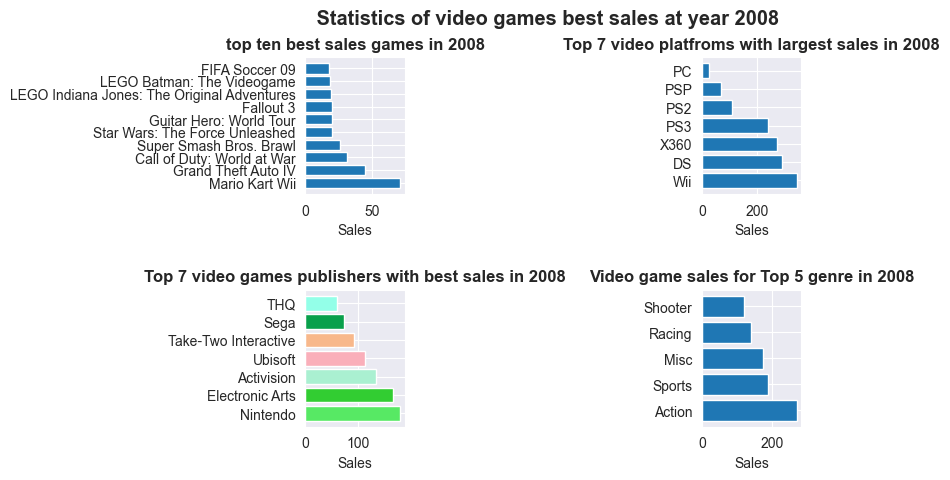

In [27]:
visualize(2008)

In [28]:
# now if we want to compare the sales of two years in same charts what do we do?
# now a function to compare two years statistics
def compare_two_years(year1,year2):
    d1=year_statistic(year1)
    d2=year_statistic(year2)
    t1=['top ten best sales games in '+str(year1),'Top 7 video platfroms with largest sales in '+str(year1),
           'Top 7 video games publishers with best sales in '+str(year1),'Video game sales for Top 5 genre in '+str(year1)]
    t2=['top ten best sales games in '+str(year2),'Top 7 video platfroms with largest sales in '+str(year2),
           'Top 7 video games publishers with best sales in '+str(year2),'Video game sales for Top 5 genre in '+str(year2)]
    fig,axes=plt.subplots(4,2,figsize=(10,25))
    s=list(d1.keys())
    z=0
    for i in range(4):
                
            sns.barplot(ax=axes[i,z],x=d1[s[i]].values,y=d1[s[i]].index)
            
            axes[i,z].set_title(t1[i],fontweight='heavy',fontsize=15,color='indigo',loc='left')
            axes[i,z].set_xlabel('Sales',fontweight='heavy')
            
            z=z+1
            sns.barplot(ax=axes[i,z],x=d2[s[i]].values,y=d2[s[i]].index)
            axes[i,z].set_title(t2[i],fontweight='heavy',fontsize=15,color='green',loc='left')
            axes[i,z].set_xlabel('Sales',fontweight='heavy')
            z=0
    plt.subplots_adjust(wspace=2,hspace=0.9)
    plt.suptitle(str(year1)+ " VS "+str(year2)+" Game Sales",fontweight='heavy',fontsize=40)

<b> Comparing sales  at diffrent years :</b>

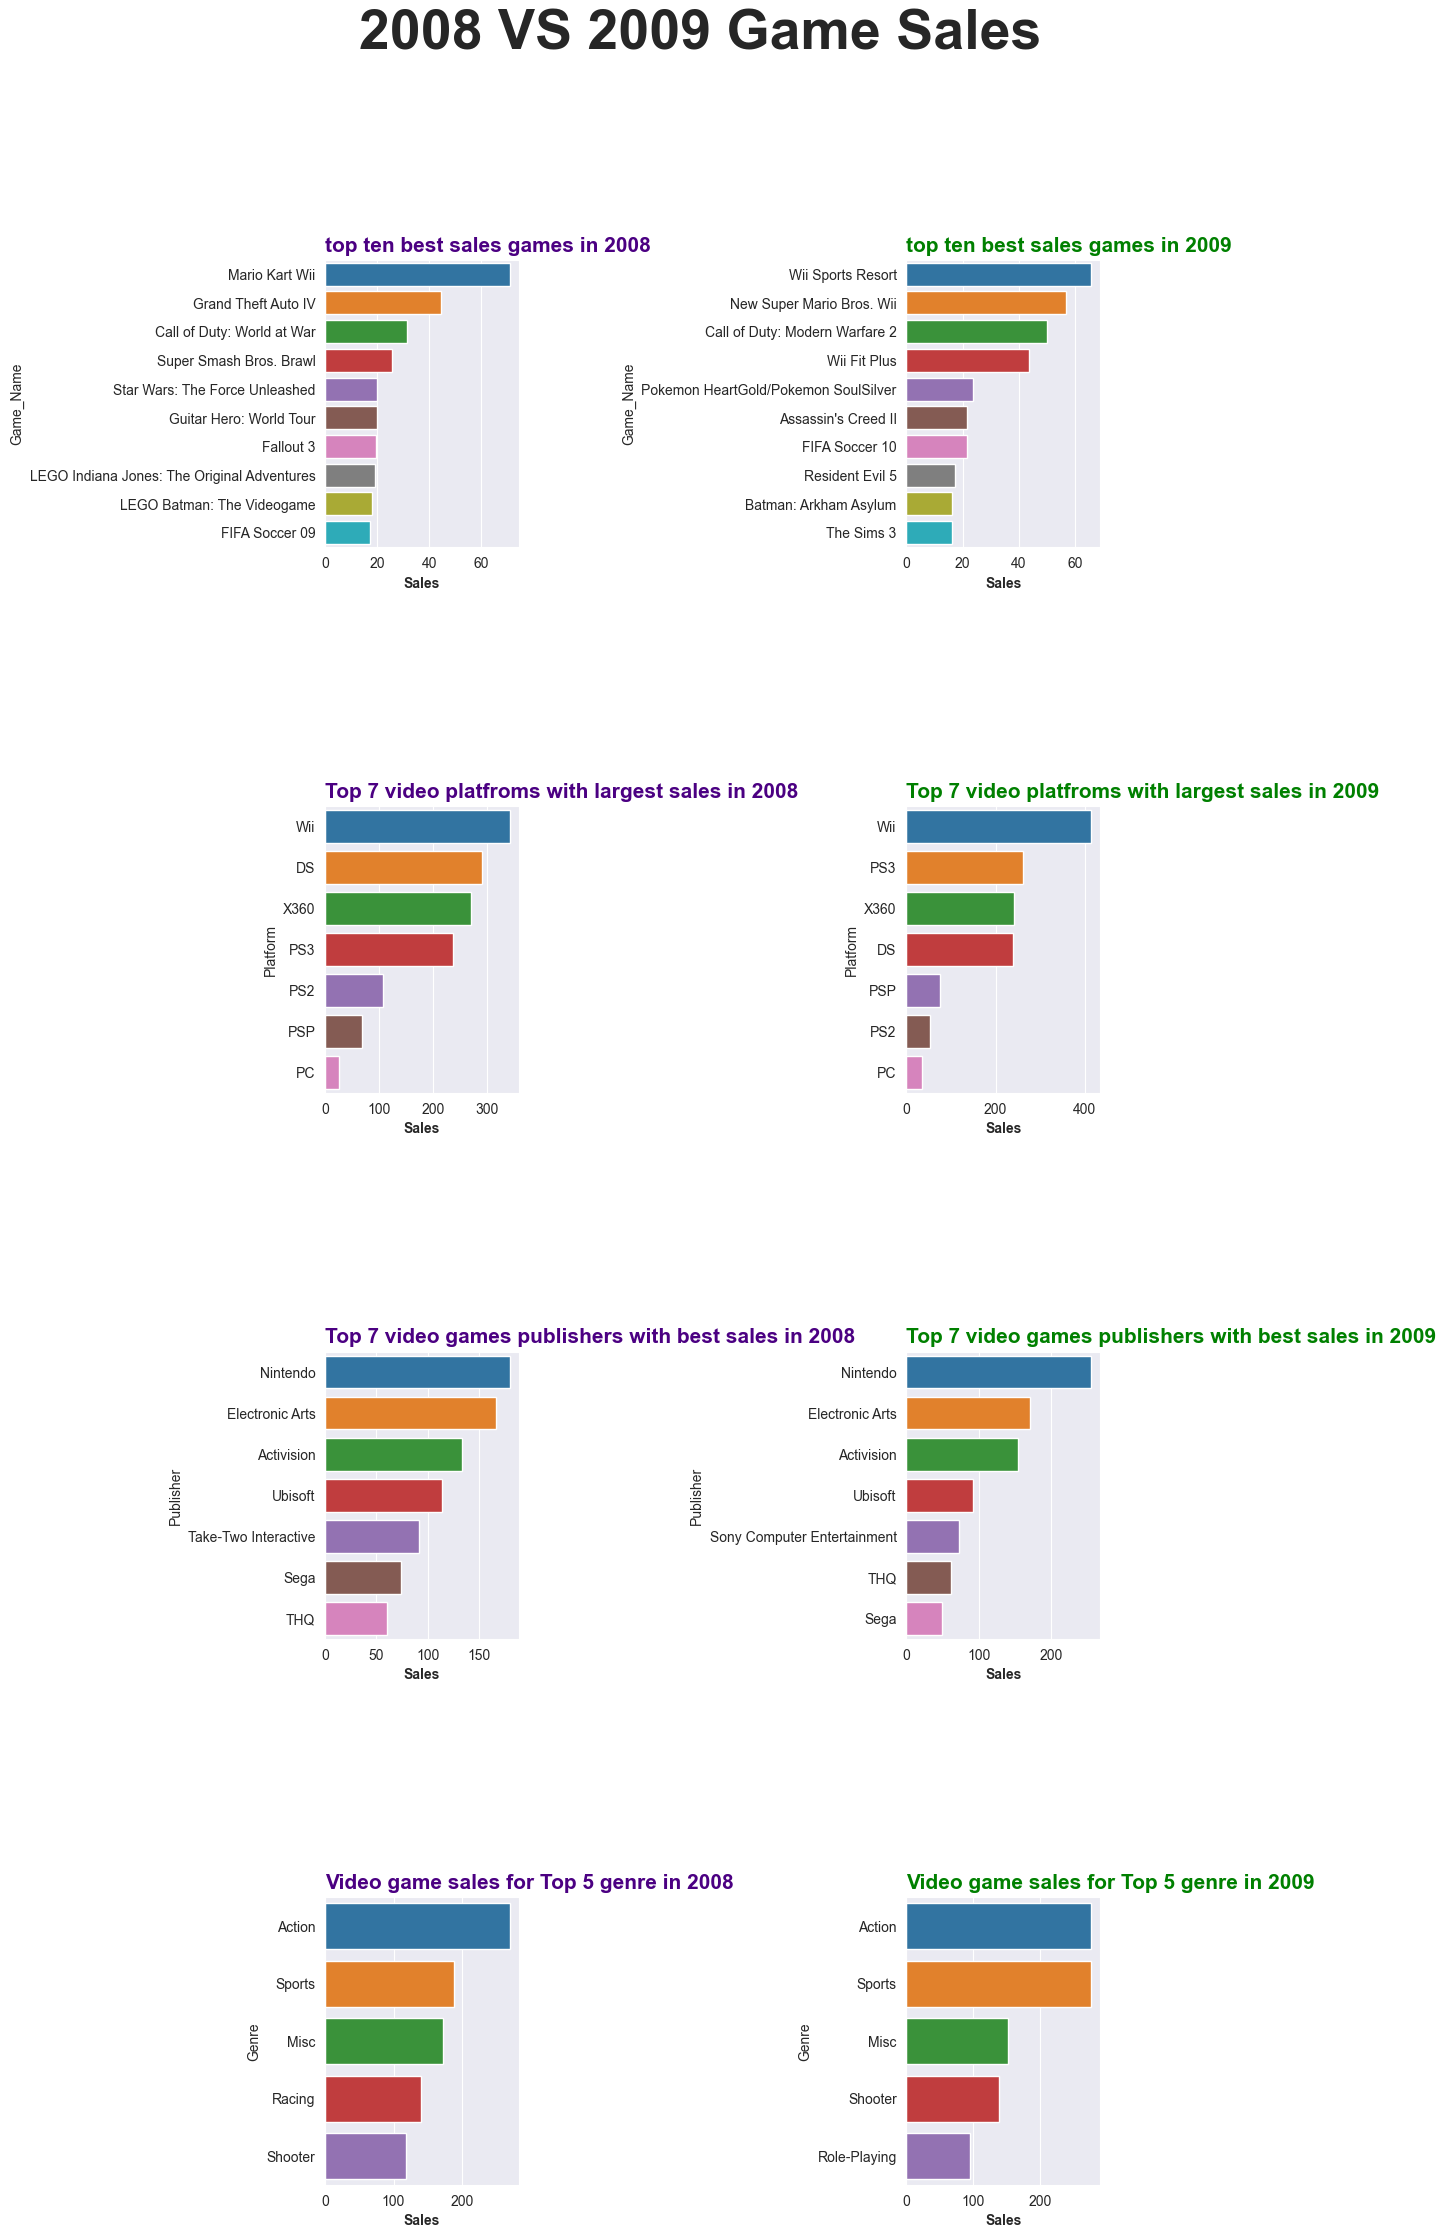

In [29]:
compare_two_years(2008,2009)

so from the chart above we can get so many info to compare sales in 2008 with 2009:
* Mario game was ranked first in 2008 and an upgraded version of it occupied the second rank in 2009
* The game with highest sales in 2009 is Wii sports resort.
* call of duty game was ranked the third in both years but the difference is that the sales of upgraded version in 2009 is higher
* Fifa souccer game ranked 10 in 2008 and its upgraded version got better rank and sales in 2009 (it got rank 7 in 2009)
* in Both years Nintendo is the company of highest sales
* in both yrears wii is the platform of highest sales but DS rank of sales got worse in 2009 jumping from rank 2 to 4
* in both years Action sports genre are the highest sales genre and we notice that shooter genre sales improved in 2009

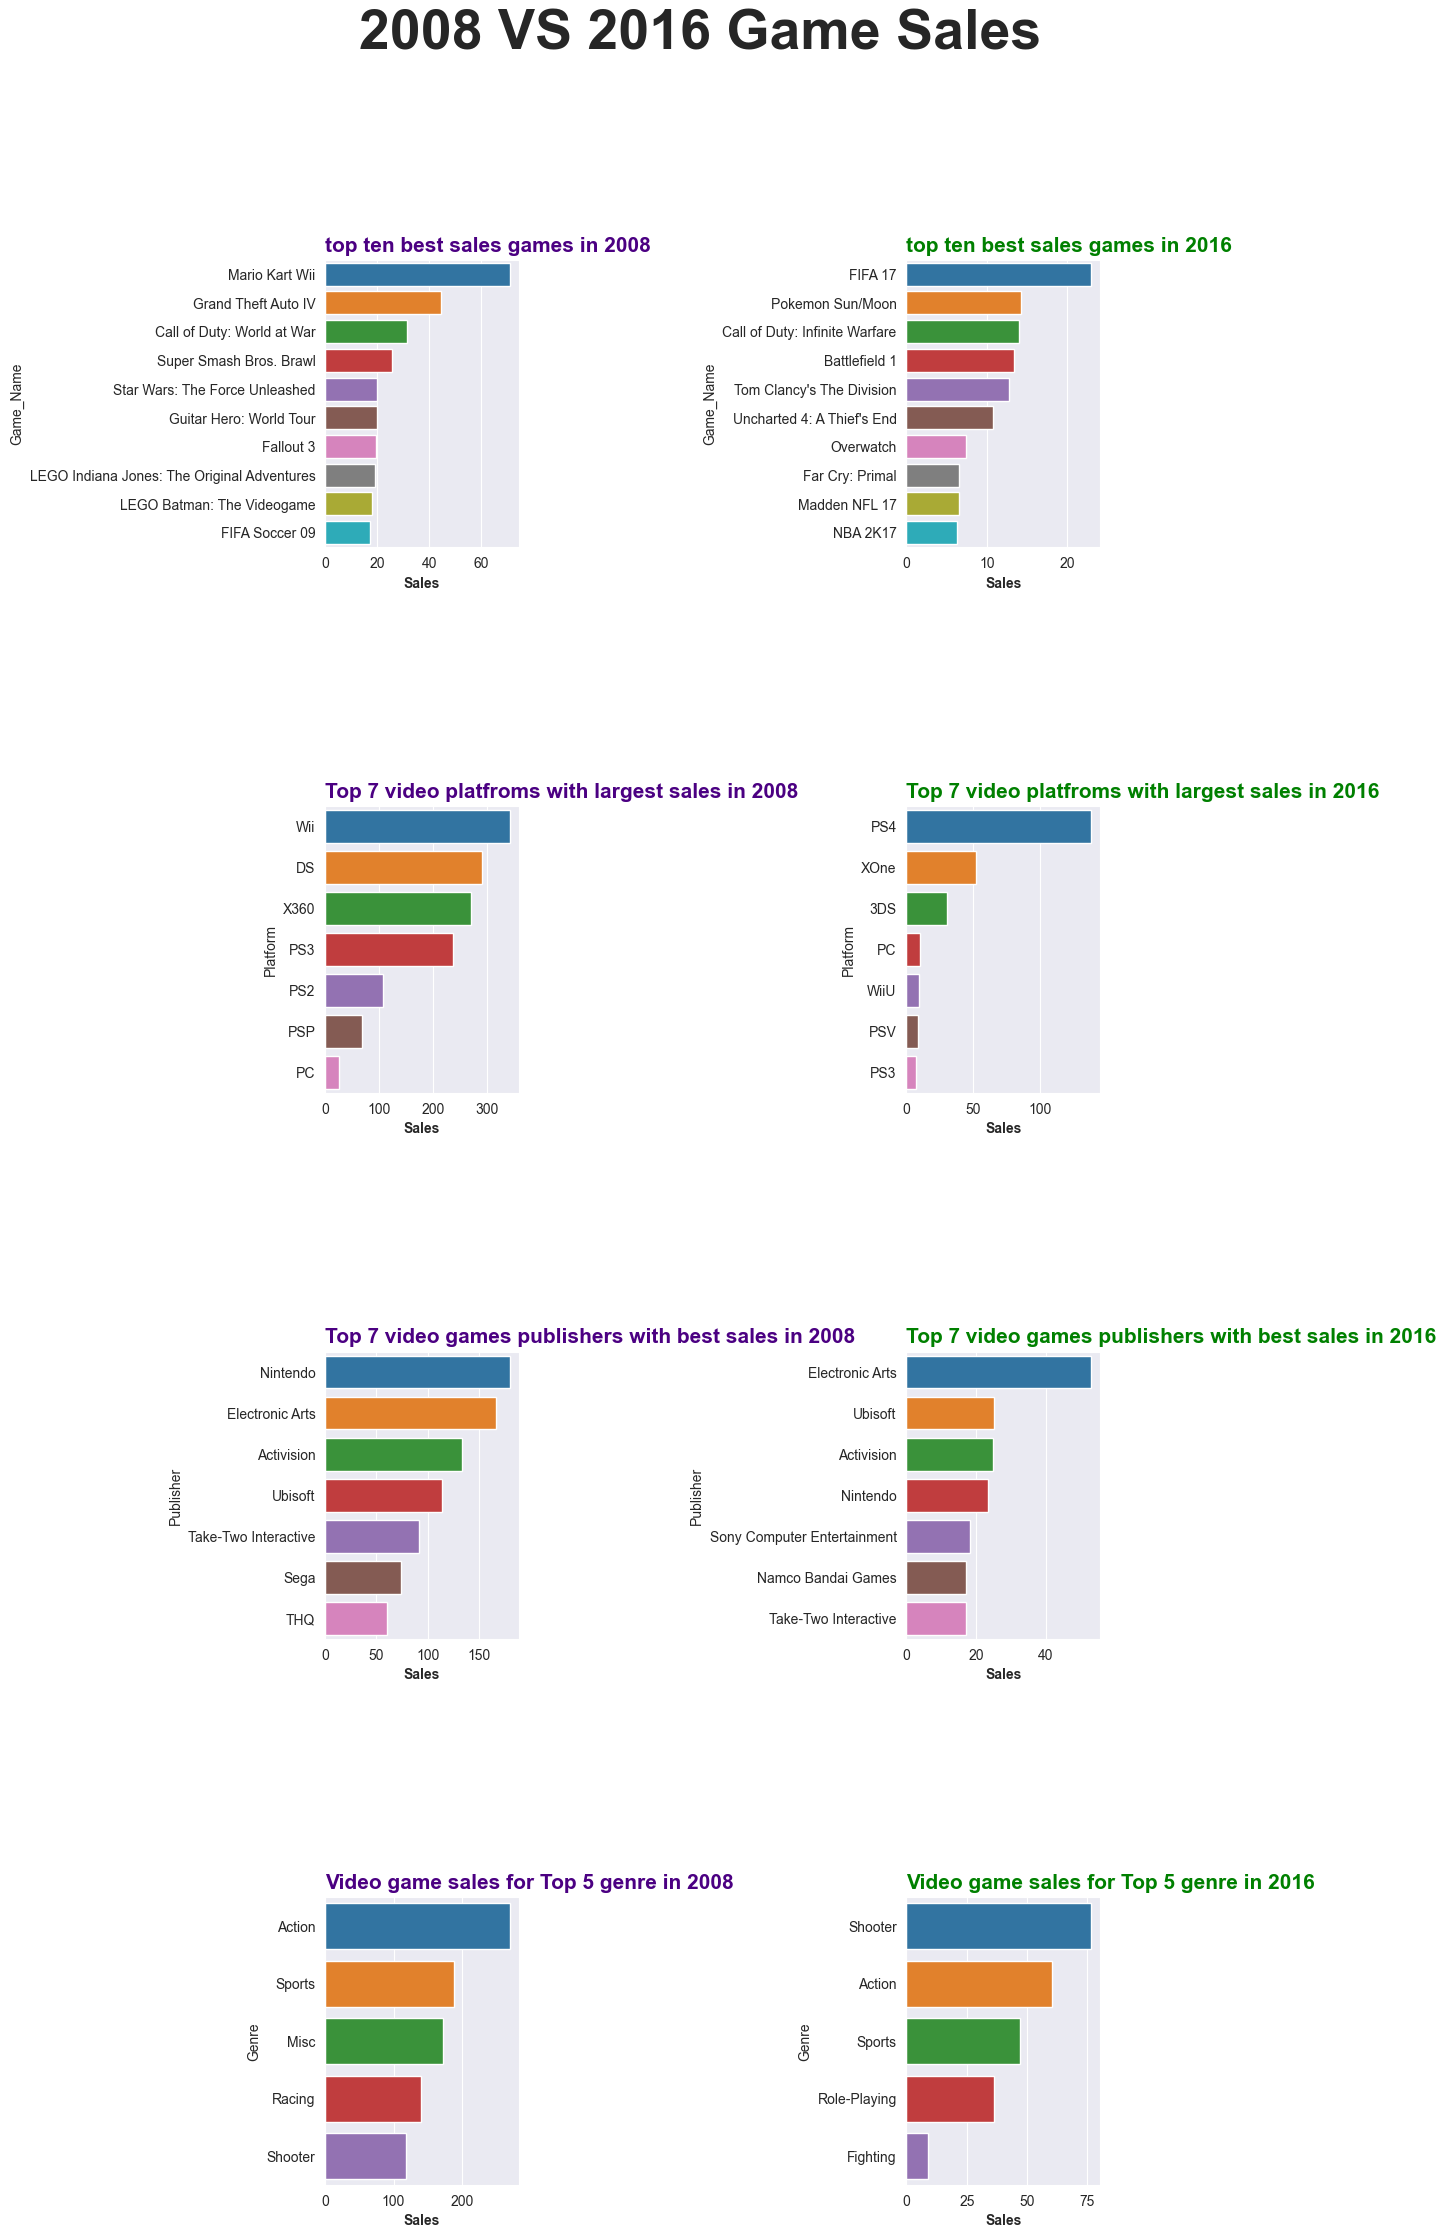

In [30]:
compare_two_years(2008,2016)

<b> Looking at the Genres we discover :</b>
* What are the overall genres of games developed all these years? 
* question 1: what is the most frequent genre of games ? and what are the less frequent game genres?
* question2 :what are the portions of sales for each one of these genres in all years?
* question 3:  what are the genres that dominate sales? and what are the genres that occupy the manority shares of sales?

In [31]:
# now we will buid a bar chart to check the frequency of each genre to know the most frequent genre
# the following function claculates the freuquency of cat variable values ,cat is a column in df dataframe
# and it plots bar chart represinting the freuquency of each value
import seaborn as sns
def frequency_bar(df,cat):
    temp=df[cat].value_counts()
    temp1=temp.sort_values(ascending=False)
    sns.barplot(x=temp1.values,y=temp1.index,palette=sns.color_palette('husl'))
    plt.xlabel(cat,fontweight='bold')
    plt.ylabel('Frequency of '+cat+' '+'values',fontweight='bold')
    plt.title('bar chart of '+cat+' values with their frequency',fontweight='bold',color='green')
    plt.show()

#plt.bar(np.linspace(0,50,len(temp.index)),temp.values,width=1,color='lightgreen')

#plt.xticks(np.linspace(0,50,len(temp.index)),labels=temp.index,rotation=90)


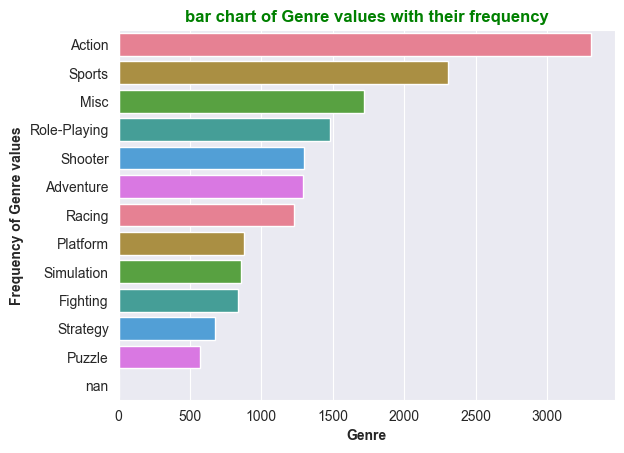

In [32]:
frequency_bar(sales,'Genre')

so from the barchart above we can see that the Genres of games developed that is recorded in this dataset are 12 Genre of games
and the inoformation that we have so far:
 * to answer question 1 we can see that Action games are the most freuquent games in this dataset sports too are frequent alot
    and Puzzle games are the least frequent games in the dataset 
 * so if action genre has the largest number of games this means that companies  developed action games more than other types of games
    which means two things :
 * one: action games were popular more than other types of games and demanded more a thing that we can not prove depending on our
            dataset only because it doesnot have info about useres favourite games and it doenot not have users data.
 * two: the sales of action games are higher than sales of other types and are sold more easily so this can be checked
                here in the dataset we will check the portions of sales for each genre to see wether action games have higher sales more than other types

<b> Does the action genre that has the highest freuquency gain more sales compared with other genres ??</b>

Text(0.5, 1.0, 'Sales portions of video game sales for each Genre')

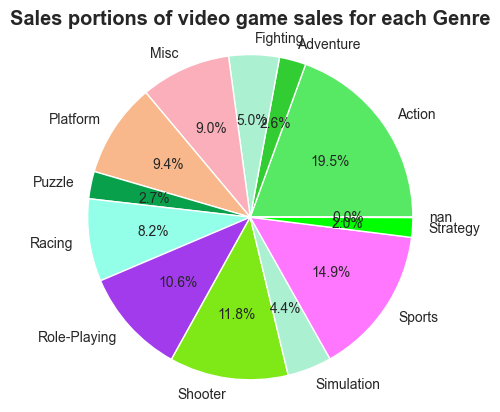

In [33]:
# to answer this question we will plot the pie chart that shows the portions of sales for each genre over the years
shares=sales.groupby('Genre')['Total_Sales'].sum()
plt.pie(shares.values,labels=shares.index,colors=['#57E964','#32CD32','#AAF0D1','#FAAFBA','#F8B88B','#08A04B','#93FFE8','#A23BEC',
                                         '#7FE817','#AAF0D1','#FF77FF','#00FF00','#6AFB92'],autopct='%1.1f%%',radius=1.1)
plt.title('Sales portions of video game sales for each Genre',fontweight='heavy',fontsize='x-large')

so from the pie chart above we can see that : 
1) action games have the largest share of sales compared with genres (so it no wonder that they have largest frquency its because they have largest sales)
2) Action Sports and Shooter are the genres that dominate the sales(dominating 46% of total sales)( here question 3 is answered)
3) Puzzle adventure and strategy have the smallest portions of sales(manority) with sales portions between 2% and 3% of total sales


<b> How does genres sales values change over years :</b>
 * do the sales of genres increase or decrease?
 * was there a genre with good sales but then its sales decreased and maybe the genre disappeard from market?
 * was there a genre who didnot have the higher sales before but suddenly it dominated the sales? what is it? 

In [34]:
# to help answer the previous questions we will plot a multiple bar chart of sales of diffeent genres over years
#first we use a pivot table to calculate total sales for each genre each year
genre=sales.pivot_table(index='Year_of_Release',columns='Genre',values='Total_Sales',aggfunc=['sum'],fill_value=0)
genre


sum                                                     \
Genre            Action Adventure Fighting    Misc Platform Puzzle  Racing   
Year_of_Release                                                              
1980.0             0.68      0.00     1.54    5.41     0.00   0.00    0.00   
1981.0            29.63      0.00     0.00    0.00    13.85   4.49    0.96   
1982.0            13.02      0.00     0.00    1.74    10.06  20.07    3.14   
1983.0             5.72      0.80     0.00    4.28    13.86   1.56    0.00   
1984.0             3.70      0.00     0.00    2.90     1.38   6.28   11.90   
1985.0             7.04      0.00     2.10    0.00    86.34   6.42    0.00   
1986.0            27.48      0.00     0.00    0.00    18.78   0.00    3.92   
1987.0             2.23      8.76    10.84    0.00     3.48   0.00    0.00   
1988.0             3.49      0.00     0.00    0.00    55.46  11.16    4.28   
1989.0             9.29      0.00     0.00    2.56    41.32  75.50    0.00   
1990.0            12.78      0.00     0.00    0.00    45.95  11.99   12.51   
1991.0            13.52      4.48     0.78    0.16    15.27   6.48    2.28   
1992.0             7.67     24.49    30.48    9.88    26.83   9.68   18.09   
1993.0             3.62      0.14    17.50    0.60    37.35   6.34    0.72   
1994.0             3.10      7.48    16.96    5.72    57.50   3.06    4.37   
1995.0             7.15      1.43    29.69   12.80    33.38   5.40   12.18   
1996.0            41.18      8.37    36.10   21.34    56.46   7.83   56.51   
1997.0            55.17      9.93    23.56   11.37    43.71  11.76   63.83   
1998.0            78.85     18.09    63.34   23.84    59.71  12.69   55.78   
1999.0            55.50     15.21    28.57   41.33    41.62   2.70   74.46   
2000.0            68.02      5.94    40.48   31.09    32.11   7.65   39.99   
2001.0           118.77     18.26    36.22   32.79    78.61  15.94  111.64   
2002.0           173.41     22.14    49.94   31.30    91.92  10.67   60.35   
2003.0           135.91      4.26    47.52   47.61    85.70   4.84  104.37   
2004.0           152.38     17.31    33.54   62.48    94.44  16.80   95.70   
2005.0           170.92     16.90    39.36  122.05    46.71  40.78  112.06   
2006.0           132.19     22.73    44.84  134.04    98.64  21.54   67.67   
2007.0           209.82     48.23    34.98  182.98    70.17  47.30   77.65   
2008.0           269.97     49.34    70.06  172.11    70.27  30.52  140.07   
2009.0           275.35     40.43    63.78  151.61    81.11  39.59   67.34   
2010.0           230.78     31.96    29.41  190.34    62.02  21.49   68.73   
2011.0           233.44     31.22    44.78  108.83    55.39   9.91   69.64   
2012.0           238.35     11.59    18.38   44.43    36.74   3.44   27.29   
2013.0           245.08     12.16    14.13   50.55    49.13   1.91   24.70   
2014.0           194.53     11.18    31.68   46.73    17.59   2.98   33.30   
2015.0           144.06     16.31    15.82   23.13    12.11   1.43   16.14   
2016.0            60.34      7.65     8.91    5.23     6.44   0.02    5.62   
2017.0             0.02      0.00     0.00    0.00     0.00   0.00    0.00   
2020.0             0.00      0.00     0.00    0.00     0.00   0.00    0.00   

                                                                        
Genre           Role-Playing Shooter Simulation  Sports Strategy   nan  
Year_of_Release                                                         
1980.0                  0.00   14.14       0.00    0.99     0.00  0.00  
1981.0                  0.00   20.06       0.89    1.57     0.00  0.00  
1982.0                  0.00    7.60       0.00    2.11     0.00  0.00  
1983.0                  0.00    0.97       0.00    6.40     0.00  0.00  
1984.0                  0.00   62.20       0.00   12.35     0.00  0.00  
1985.0                  0.00    2.00       0.07    3.92     0.00  0.00  
1986.0                  5.04    7.78       0.00   11.15     0.00  0.00  
1987.0       

with the help of previous table by looking at any genre column we can track the sales of this specific genre over the year
and by looking at any row we will be able to compare sales of different genres at a specific year

In [35]:
cols=[genre.columns[i][1] for i in range(len(genre.columns))]
genre.columns=cols
# now we will look how sales of genres change between 2008 and 2020
geen=genre.loc[2008:2020]
geen

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,nan
Year_of_Release,,,,,,,,,,,,,
2008.0,269.97,49.34,70.06,172.11,70.27,30.52,140.07,118.01,118.38,92.20,189.21,23.15,0.0
2009.0,275.35,40.43,63.78,151.61,81.11,39.59,67.34,94.60,138.59,65.95,274.70,24.65,0.0
2010.0,230.78,31.96,29.41,190.34,62.02,21.49,68.73,139.22,153.70,43.04,182.58,27.45,0.0
2011.0,233.44,31.22,44.78,108.83,55.39,9.91,69.64,105.68,196.35,30.27,112.20,17.66,0.0
2012.0,238.35,11.59,18.38,44.43,36.74,3.44,27.29,93.82,143.55,26.72,60.84,6.53,0.0
2013.0,245.08,12.16,14.13,50.55,49.13,1.91,24.70,88.87,124.09,17.25,82.40,12.21,0.0
2014.0,194.53,11.18,31.68,46.73,17.59,2.98,33.30,91.19,130.47,11.17,90.25,1.97,0.0
2015.0,144.06,16.31,15.82,23.13,12.11,1.43,16.14,75.30,135.00,11.30,81.74,3.69,0.0
2016.0,60.34,7.65,8.91,5.23,6.44,0.02,5.62,36.30,76.45,3.78,47.02,2.28,0.0


In [36]:
# now we build the multiple bar chart
# the width of each single bar
width=0.5
plt.figure(figsize=(400,100))
#plt.plot([1,2],[1,2])
# an array to specify the distance between multiple bars
# r helps to specify number of ticks and distance between those ticks each tick has a year on it
#r=np.arange(0,800,len(geen.index))
r=np.linspace(1,200,12)
j=1
# tt is a list that  help to choose the place of ticks
tt=[]
#for bb,i in enumerate(geen.columns[:4]):
#	plt.bar(r+width*j,geen[i],width=width,label=i)
#	tt.append(r+width*j)
#	j=j+1
# colors each color represent a genre
#colors=['blue','lightgreen','green','orange','yellow','magenta','pink','black','#AAF0D1','#FF77FF','#00FF00','#6AFB92','white']

#   tt.append(r+width*j)
#plt.legend()
#plt.show()
#plt.xticks(tt[2],list(geen.index))



<Figure size 40000x10000 with 0 Axes>

In [37]:
r=np.arange(0,3000,140)[:12]
r

array([   0,  140,  280,  420,  560,  700,  840,  980, 1120, 1260, 1400,
       1540])

In [38]:
help(plt.figure)

Help on function figure in module matplotlib.pyplot:

figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)
    Create a new figure, or activate an existing figure.
    
    Parameters
    ----------
    num : int or str or `.Figure`, optional
        A unique identifier for the figure.
    
        If a figure with that identifier already exists, this figure is made
        active and returned. An integer refers to the ``Figure.number``
        attribute, a string refers to the figure label.
    
        If there is no figure with the identifier or *num* is not given, a new
        figure is created, made active and returned.  If *num* is an int, it
        will be used for the ``Figure.number`` attribute, otherwise, an
        auto-generated integer value is used (starting at 1 and incremented
        for each new figure). If *num* is a string, the figure label and the
        wind

In [39]:
3*4

12

In [40]:
plt.figure(figsize=(400,50),edgecolor='green')
plt.plot([0,1],[1,2])
plt.show()

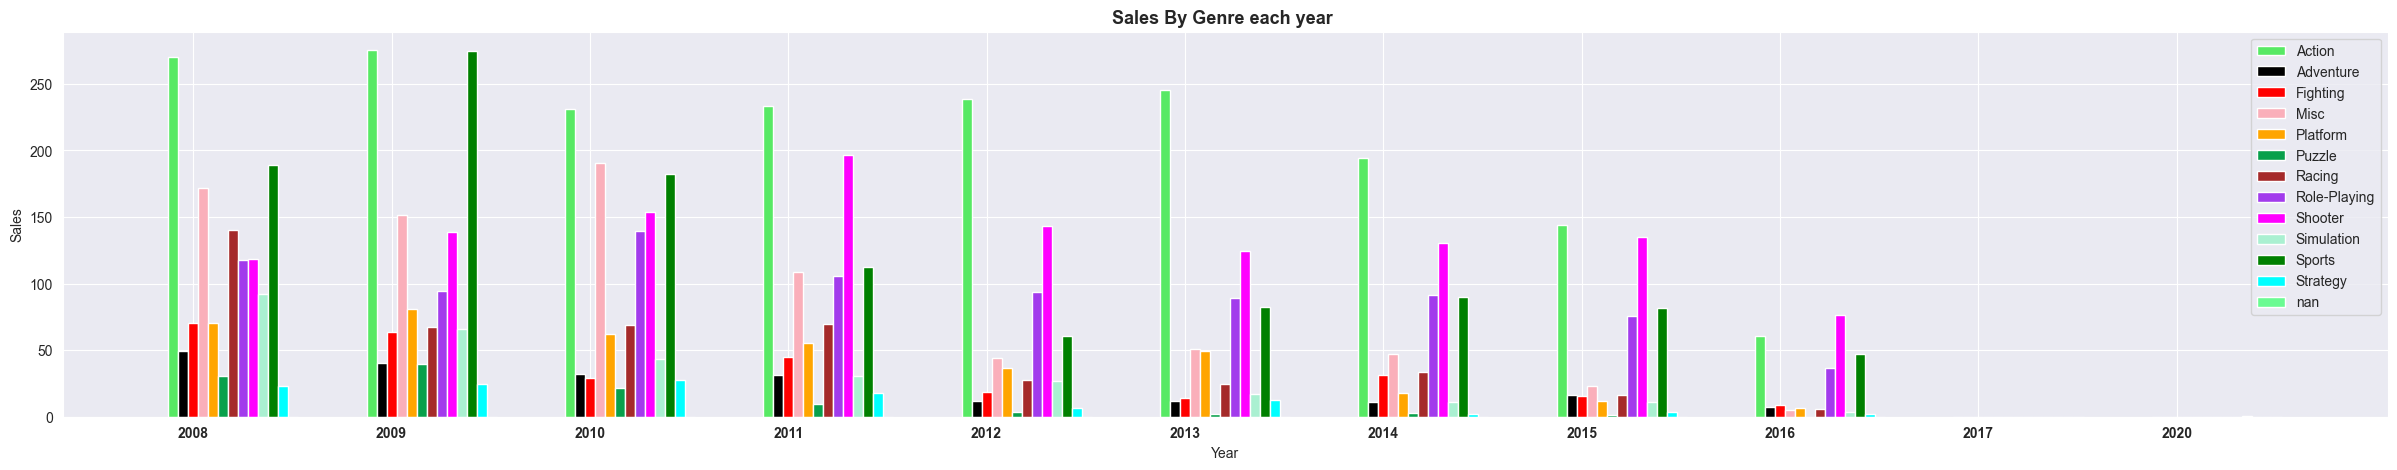

In [41]:
# here we plot a multiple bar chart to show how the sales of each genre change by time
plt.figure(figsize=(30,5))
# an array to specify the number of ticks and the distance between each two ticks
# using the function numpy.linspace ensures that the distance is equal between any two neibouring elements
rr=np.linspace(1,100,len(geen.index))
# the width of every single bar
width=0.5
tt=[]
# multiplying the width with j inside the loop ensures that bars in same tick dont overlap

j=1
# each color will represent a genre in the legend
colors=['#57E964','black','red','#FAAFBA','orange','#08A04B','brown','#A23BEC',
                                         'magenta','#AAF0D1','green','cyan','#6AFB92']
ax=plt.axes()
for i,jj in enumerate(geen.columns):
    plt.bar(rr+width*j,geen[jj],width=width,label=jj,color=colors[i])
    tt.append(rr+width*j)
    j+=1

plt.legend()
ax.set_xticks(tt[2],labels=pd.Series(geen.index).apply(lambda x:int(x)),fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Sales')
ax.set_title('Sales By Genre each year ',fontsize=13,fontweight='bold')
plt.show()

The multiple bar chart above demontrates the sales of all genres of games each year from 2008 to 2020 :
* in all the years from 2008 to 2015 we can the action genre of games dominating the first place of highest sales in the year
* sports sales were the second highest after action too between year 2008 and 2010 but in 2011 shooter games dominate the second place
of highest sales
* after 2013 we can notice that salaes of action genre are lower and decrease each year and even though
shooter games dominate first place in 2016 their sales at that year is lower than all prevoius years
* the huge diffference happens in 2017 were we can see the genre action (who once dominated the first rank of highest sales many years) disappearing
from the market sports too disappear shooter role plying the only genre left in 2020 is simulation
* the simulation genre is the only genre of games that has sales in 2020 and its very very low

<b> so if we want to answer the question were sales of genres increasing or decreaseing? well we can see that after 2015 
there was a huge difference in the market and sales were very low at time range from 2016 to 2020 we can see that sales
of all genres have decreased starting from that year and they decreased very much to the point that some genres disappeared 
from the market completely so the genres that used to have very good sales but they disappeared from the market after 2016
are action sports shooter and even genres which used to have small sales disappeared from market </b>

later we will discuss how sales values (wether they are increasing or decreasing ) affect the market and then we will
explain why sales values affect the variety of genres in the market

In [42]:
# lets see the genres of games released in 2016
genres_2016=set(sales.query('Year_of_Release==2016')['Genre'])
genres_2017=set(sales.query('Year_of_Release==2017')['Genre'])
print('The genres of games that were released in 2016 are',genres_2016,'\n')
print('The genres of games that were realeased in 2017 are ',genres_2017,'\n')
print('The genres that exist in 2016 but not in 2017 are ',genres_2016.difference(genres_2017),'\n')

The genres of games that were released in 2016 are {'Platform', 'Sports', 'Role-Playing', 'Puzzle', 'Misc', 'Shooter', 'Fighting', 'Simulation', 'Strategy', 'Adventure', 'Action', 'Racing'} 

The genres of games that were realeased in 2017 are  {'Role-Playing', 'Action'} 

The genres that exist in 2016 but not in 2017 are  {'Platform', 'Sports', 'Puzzle', 'Misc', 'Shooter', 'Fighting', 'Simulation', 'Strategy', 'Adventure', 'Racing'} 



so the from inspecting genres of 2016 and 2017 games we could see that some genres were no longer in the market
and the variety in the genres decreased very much and there were only small number of genres left

<b> looking at publishers we discover :</b>
  * What are the most freuquent companies in the time range of the dataset?
   * what is the company that have the highest sales each year?
   * how does publishers performance regarding sales changes each year?
   * who are the publishers who preseverd their place over the years and are strong competents in the market?
   *  who are the publishers that are frequent on top ten highest sales list
   *  is there any publishers who used to dominat the market but they suddnly disappeared ?
    

<b>what are the most frequent companies?</b>

In [43]:
top10_publishers=sales['Publisher'].value_counts().sort_values(ascending=False).head(20)
top10_publishers

Electronic Arts                           1344
Activision                                 976
Namco Bandai Games                         935
Ubisoft                                    930
Konami Digital Entertainment               825
THQ                                        712
Nintendo                                   700
Sony Computer Entertainment                686
Sega                                       631
Take-Two Interactive                       421
Capcom                                     381
Atari                                      351
Tecmo Koei                                 348
Square Enix                                232
Warner Bros. Interactive Entertainment     220
Disney Interactive Studios                 214
Midway Games                               196
Eidos Interactive                          196
Microsoft Game Studios                     191
505 Games                                  191
Name: Publisher, dtype: int64

Text(0, 0.5, 'Publisher ')

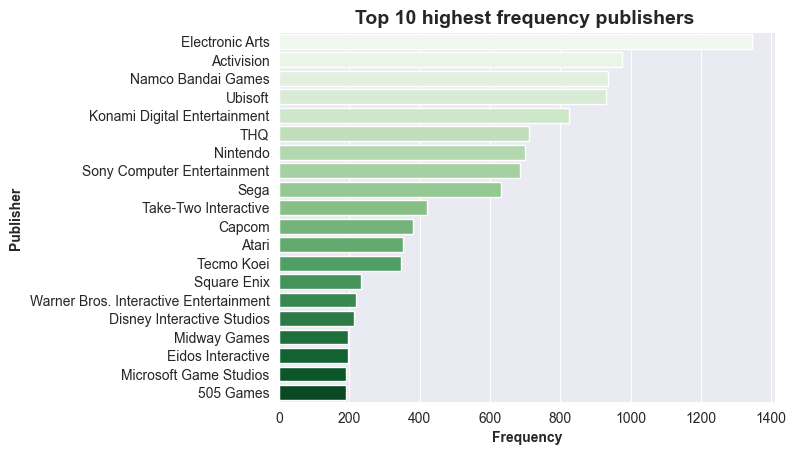

In [44]:
sns.barplot(x=top10_publishers.values,y=top10_publishers.index,palette='Greens')
plt.title('Top 10 highest frequency publishers ',fontweight='bold',fontsize=14)
plt.xlabel('Frequency',fontweight='bold')
plt.ylabel('Publisher ',fontweight='bold')

from the bar chart above we can see that Electronic Arts company has the highest frequency followed by Activision and Namco 
Bandai games here the high frequency means that Electoric arts is the company who has released the largets number of games
from 1980 to 2020 the other companies mentioned released a large number of games too
this could mean that those companies are strong competents in the market we will view this later

<b>what are the companies who have the highst sales each year?</b>

In [45]:
sal=sales.pivot_table(index='Publisher',columns='Year_of_Release',values='Total_Sales',aggfunc=['sum'],fill_value=0)
sal

sum                                            \
Year_of_Release              1980.0 1981.0 1982.0 1983.0 1984.0 1985.0 1986.0   
Publisher                                                                       
10TACLE Studios                 0.0    0.0   0.00    0.0    0.0    0.0    0.0   
1C Company                      0.0    0.0   0.00    0.0    0.0    0.0    0.0   
20th Century Fox Video Games    0.0    2.7   1.17    0.0    0.0    0.0    0.0   
2D Boy                          0.0    0.0   0.00    0.0    0.0    0.0    0.0   
3DO                             0.0    0.0   0.00    0.0    0.0    0.0    0.0   
...                             ...    ...    ...    ...    ...    ...    ...   
imageepoch Inc.                 0.0    0.0   0.00    0.0    0.0    0.0    0.0   
inXile Entertainment            0.0    0.0   0.00    0.0    0.0    0.0    0.0   
mixi, Inc                       0.0    0.0   0.00    0.0    0.0    0.0    0.0   
nan                             0.0    0.0   0.00    0.0    0.0    0.0    0.0   
responDESIGN                    0.0    0.0   0.00    0.0    0.0    0.0    0.0   

                                                   ...                       \
Year_of_Release              1987.0 1988.0 1989.0  ... 2009.0 2010.0 2011.0   
Publisher                                          ...                        
10TACLE Studios                 0.0    0.0    0.0  ...   0.00   0.00   0.00   
1C Company                      0.0    0.0    0.0  ...   0.02   0.00   0.17   
20th Century Fox Video Games    0.0    0.0    0.0  ...   0.00   0.00   0.00   
2D Boy                          0.0    0.0    0.0  ...   0.00   0.00   0.00   
3DO                             0.0    0.0    0.0  ...   0.00   0.00   0.00   
...                             ...    ...    ...  ...    ...    ...    ...   
imageepoch Inc.                 0.0    0.0    0.0  ...   0.00   0.00   0.00   
inXile Entertainment            0.0    0.0    0.0  ...   0.00   0.00   0.00   
mixi, Inc                       0.0    0.0    0.0  ...   0.00   0.00   0.00   
nan                             0.0    0.0    0.0  ...   0.00   0.32   0.38   
responDESIGN                    0.0    0.0    0.0  ...   0.00   0.00   0.00   

                                                                               
Year_of_Release              2012.0 2013.0 2014.0 2015.0 2016.0 2017.0 2020.0  
Publisher                                                                      
10TACLE Studios                 0.0    0.0   0.00   0.00   0.00    0.0    0.0  
1C Company                      0.0    0.0   0.00   0.00   0.00    0.0    0.0  
20th Century Fox Video Games    0.0    0.0   0.00   0.00   0.00    0.0    0.0  
2D Boy                          0.0    0.0   0.00   0.00   0.00    0.0    0.0  
3DO                             0.0    0.0   0.00   0.00   0.00    0.0    0.0  
...                             ...    ...    ...    ...    ...    ...    ...  
imageepoch Inc.                 0.0    0.0   0.08   0.00   0.00    0.0    0.0  
inXile Entertainment            0.0    0.0   0.00   0.20   0.00    0.0    0.0  
mixi, Inc                       0.0    0.0   0.00   1.74   0.00    0.0    0.0  
nan                             0.0    0.0   0.00   0.00   0.06    0.0    0.0  
responDESIGN                    0.0    0.0   0.00   0.00   0.00    0.0    0.0  

[580 rows x 39 columns]

now we can see that the prevoius table is very important looking at any specific row will allow us to track the performance
of any specific company over the years are sales of the specified company increasing or decreasing ? and  by looking at each
year column we will be able to know the place of each company compared with its opponents at the specified year

In [46]:
# now we want to know the companies who have the highest sales each year 
sal.columns=[sal.columns[i][1] for i in range(len(sal.columns))]
sal.columns

Float64Index([1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0,
              1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0,
              1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0,
              2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0,
              2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2020.0],
             dtype='float64')

In [47]:
sal[sal[1980]==sal.max()[1980]].index

Index(['Atari'], dtype='object', name='Publisher')

In [48]:
aa={i:sal[sal[i]==sal.max()[i]].index[0] for  i in sal.columns}
aa

{1980.0: 'Atari',
 1981.0: 'Activision',
 1982.0: 'Atari',
 1983.0: 'Nintendo',
 1984.0: 'Nintendo',
 1985.0: 'Nintendo',
 1986.0: 'Nintendo',
 1987.0: 'Nintendo',
 1988.0: 'Nintendo',
 1989.0: 'Nintendo',
 1990.0: 'Nintendo',
 1991.0: 'Nintendo',
 1992.0: 'Nintendo',
 1993.0: 'Nintendo',
 1994.0: 'Nintendo',
 1995.0: 'Sony Computer Entertainment',
 1996.0: 'Nintendo',
 1997.0: 'Sony Computer Entertainment',
 1998.0: 'Nintendo',
 1999.0: 'Nintendo',
 2000.0: 'Nintendo',
 2001.0: 'Nintendo',
 2002.0: 'Electronic Arts',
 2003.0: 'Electronic Arts',
 2004.0: 'Electronic Arts',
 2005.0: 'Nintendo',
 2006.0: 'Nintendo',
 2007.0: 'Nintendo',
 2008.0: 'Nintendo',
 2009.0: 'Nintendo',
 2010.0: 'Electronic Arts',
 2011.0: 'Electronic Arts',
 2012.0: 'Nintendo',
 2013.0: 'Nintendo',
 2014.0: 'Nintendo',
 2015.0: 'Electronic Arts',
 2016.0: 'Electronic Arts',
 2017.0: 'Sega',
 2020.0: 'Ubisoft'}

In [49]:
aa=pd.Series(aa)
aa.value_counts().sort_values(ascending=False)

Nintendo                       25
Electronic Arts                 7
Atari                           2
Sony Computer Entertainment     2
Activision                      1
Sega                            1
Ubisoft                         1
dtype: int64

so we can see that Nintendo company is a very strong competent in the market with it occuping the highest sales for 25 year
out of 40 years electronic arts Atari Activion must be competenig in the market too(no wonder that electoric arts released
    a very large number of games it is a strong opponent and it secured the first place for highest sales  for 7 times)

In [50]:
aa

1980.0                          Atari
1981.0                     Activision
1982.0                          Atari
1983.0                       Nintendo
1984.0                       Nintendo
1985.0                       Nintendo
1986.0                       Nintendo
1987.0                       Nintendo
1988.0                       Nintendo
1989.0                       Nintendo
1990.0                       Nintendo
1991.0                       Nintendo
1992.0                       Nintendo
1993.0                       Nintendo
1994.0                       Nintendo
1995.0    Sony Computer Entertainment
1996.0                       Nintendo
1997.0    Sony Computer Entertainment
1998.0                       Nintendo
1999.0                       Nintendo
2000.0                       Nintendo
2001.0                       Nintendo
2002.0                Electronic Arts
2003.0                Electronic Arts
2004.0                Electronic Arts
2005.0                       Nintendo
2006.0      

we can see from the table above that nintendo is the company who dominated sales in golden years between 2007 and 2009

In [51]:
# lets view the salesof all the companies who occupied  first rank over the years
yy=sal.loc[sal.index.isin(aa.values)]
yy

,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2020.0
Publisher,,,,,,,,,,,,,,,,,,,,,
Activision,6.05,16.99,3.75,3.88,0.54,0.97,0.00,2.23,1.49,0.95,...,154.36,125.32,101.85,104.33,85.48,88.76,71.69,24.96,0.0,0.00
Atari,16.71,16.87,38.86,6.80,0.00,0.00,1.33,1.69,0.00,0.30,...,8.91,2.77,0.42,0.09,0.00,0.00,0.00,0.21,0.0,0.00
Electronic Arts,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,170.57,160.51,142.97,97.97,104.38,90.39,91.46,52.96,0.0,0.00
Nintendo,0.00,0.00,0.00,21.92,91.11,99.90,32.35,23.90,72.88,127.75,...,254.80,119.49,103.37,112.27,106.96,97.76,55.23,23.49,0.0,0.00
Sega,0.00,0.00,0.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,49.05,44.60,32.88,17.86,10.07,10.81,3.25,1.97,0.1,0.00
Sony Computer Entertainment,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,72.29,68.97,53.49,24.38,23.96,37.30,22.43,18.18,0.0,0.00
Ubisoft,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,92.60,83.87,94.40,73.02,53.61,81.72,25.38,25.24,0.0,0.58


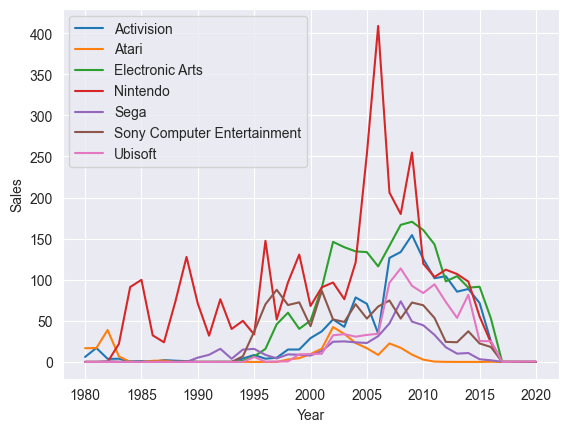

In [52]:
for h in yy.index:
    plt.plot(yy.loc[h].index,yy.loc[h].values,label=h)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()
    

<b> who are the companies who are frequent on top 10 highest sales list?</b>

In [53]:
# we we will use sal table to know the companies who have highest sales each year
ee={i:sal[i].sort_values(ascending=False).head(10).index for i in sal.columns}
ee

{1980.0: Index(['Atari', 'Activision', '10TACLE Studios', 'PM Studios',
        'Pacific Century Cyber Works', 'Pack In Soft', 'Pack-In-Video',
        'Palcom', 'Panther Software', 'Paon'],
       dtype='object', name='Publisher'),
 1981.0: Index(['Activision', 'Atari', 'Imagic', 'Parker Bros.', 'Coleco',
        'Mattel Interactive', '20th Century Fox Video Games', 'Tigervision',
        'Mystique', 'Men-A-Vision'],
       dtype='object', name='Publisher'),
 1982.0: Index(['Atari', 'Activision', 'Parker Bros.', 'Quelle', 'Universal Gamex',
        'Wizard Video Games', '20th Century Fox Video Games', 'CPG Products',
        'Answer Software', 'Sega'],
       dtype='object', name='Publisher'),
 1983.0: Index(['Nintendo', 'Atari', 'Activision', 'Parker Bros.', '10TACLE Studios',
        'Panther Software', 'Pacific Century Cyber Works', 'Pack In Soft',
        'Pack-In-Video', 'Palcom'],
       dtype='object', name='Publisher'),
 1984.0: Index(['Nintendo', 'Namco Bandai Games', 'Hudson

In [54]:
# the following data frame contains the names of companies with the top ten highest sales each year
eb=pd.DataFrame(ee)
eb

,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2020.0
0,Atari,Activision,Atari,Nintendo,Nintendo,Nintendo,Nintendo,Nintendo,Nintendo,Nintendo,...,Nintendo,Electronic Arts,Electronic Arts,Nintendo,Nintendo,Nintendo,Electronic Arts,Electronic Arts,Sega,Ubisoft
1,Activision,Atari,Activision,Atari,Namco Bandai Games,Namco Bandai Games,Capcom,Namco Bandai Games,Enix Corporation,Palcom,...,Electronic Arts,Activision,Nintendo,Activision,Electronic Arts,Electronic Arts,Activision,Ubisoft,Idea Factory,10TACLE Studios
2,10TACLE Studios,Imagic,Parker Bros.,Activision,Hudson Soft,Hudson Soft,Namco Bandai Games,Enix Corporation,Capcom,Capcom,...,Activision,Nintendo,Activision,Electronic Arts,Take-Two Interactive,Activision,Nintendo,Activision,10TACLE Studios,Phenomedia
3,PM Studios,Parker Bros.,Quelle,Parker Bros.,Activision,Capcom,Konami Digital Entertainment,Activision,Namco Bandai Games,SquareSoft,...,Ubisoft,Microsoft Game Studios,Ubisoft,Ubisoft,Activision,Ubisoft,Warner Bros. Interactive Entertainment,Nintendo,Panther Software,PM Studios
4,Pacific Century Cyber Works,Coleco,Universal Gamex,10TACLE Studios,Paon,Activision,Hudson Soft,Konami Digital Entertainment,SquareSoft,Namco Bandai Games,...,Sony Computer Entertainment,Ubisoft,Sony Computer Entertainment,Take-Two Interactive,Ubisoft,Take-Two Interactive,Bethesda Softworks,Sony Computer Entertainment,PQube,PQube
5,Pack In Soft,Mattel Interactive,Wizard Video Games,Panther Software,PQube,Mycom,Atari,Atari,Activision,Konami Digital Entertainment,...,THQ,Take-Two Interactive,THQ,Namco Bandai Games,Warner Bros. Interactive Entertainment,Sony Computer Entertainment,Namco Bandai Games,Namco Bandai Games,Pacific Century Cyber Works,Pacific Century Cyber Works
6,Pack-In-Video,20th Century Fox Video Games,20th Century Fox Video Games,Pacific Century Cyber Works,Pacific Century Cyber Works,Paon,Pacific Century Cyber Works,SquareSoft,Maxis,Activision,...,Sega,Sony Computer Entertainment,Bethesda Softworks,Microsoft Game Studios,Microsoft Game Studios,Warner Bros. Interactive Entertainment,Take-Two Interactive,Take-Two Interactive,Pack In Soft,Pack In Soft
7,Palcom,Tigervision,CPG Products,Pack In Soft,Pack In Soft,Pacific Century Cyber Works,Pack In Soft,Capcom,Phantom EFX,Atari,...,Capcom,Sega,Namco Bandai Games,Capcom,Square Enix,Microsoft Game Studios,Ubisoft,Bethesda Softworks,Pack-In-Video,Pack-In-Video
8,Panther Software,Mystique,Answer Software,Pack-In-Video,Pack-In-Video,Pack In Soft,Pack-In-Video,10TACLE Studios,Phantagram,HAL Laboratory,...,Take-Two Interactive,THQ,Microsoft Game Studios,Warner Bros. Interactive Entertainment,Sony Computer Entertainment,Square Enix,Sony Computer Entertainment,Square Enix,Palcom,Palcom
9,Paon,Men-A-Vision,Sega,Palcom,Palcom,Pack-In-Video,Palcom,Paon,Performance Designed Products,Paon,...,Namco Bandai Games,Disney Interactive Studios,Warner Bros. Interactive Entertainment,Sony Computer Entertainment,Sony Computer Entertainment Europe,Namco Bandai Games,Microsoft Game Studios,Warner Bros. Interactive Entertainment,Paon,Panther Software


by looking at each year column in previous table  we will know companies who occupied the ranks of highest sales each year
for example looking at 1980 column we can see that Atari company has the first rank in highest sales that year followed by activision
here the reason isnot to know the sales of companies each  year but to know who are the companies that have freuquent appearance
on top ten highest sales each year because that indicates that they are strong comptents in the market

In [55]:
# lets calculate the freuquency of each value in the market
drr={}
for i in range(eb.shape[0]):
    for j in range(eb.shape[1]):
        if eb.values[i,j] in drr:
            drr[eb.values[i,j]]=drr[eb.values[i,j]]+1
        else:
            drr[eb.values[i,j]]=1
drr

{'Atari': 10,
 'Activision': 30,
 'Nintendo': 34,
 'Sony Computer Entertainment': 23,
 'Electronic Arts': 22,
 'Sega': 16,
 'Ubisoft': 17,
 'Namco Bandai Games': 23,
 'Capcom': 12,
 'Enix Corporation': 6,
 'Palcom': 7,
 'Idea Factory': 1,
 '10TACLE Studios': 5,
 'Imagic': 1,
 'Parker Bros.': 3,
 'Hudson Soft': 7,
 'Konami Digital Entertainment': 18,
 'Virgin Interactive': 4,
 'THQ': 13,
 'Take-Two Interactive': 15,
 'Phenomedia': 2,
 'PM Studios': 2,
 'Quelle': 1,
 'SquareSoft': 12,
 'Arena Entertainment': 1,
 'Acclaim Entertainment': 6,
 'Eidos Interactive': 4,
 'Microsoft Game Studios': 10,
 'Warner Bros. Interactive Entertainment': 6,
 'Panther Software': 4,
 'Pacific Century Cyber Works': 7,
 'Coleco': 1,
 'Universal Gamex': 1,
 'Paon': 6,
 'Square': 1,
 'Bethesda Softworks': 3,
 'PQube': 3,
 'Pack In Soft': 7,
 'Mattel Interactive': 1,
 'Wizard Video Games': 1,
 'Mycom': 1,
 'GT Interactive': 3,
 'Pack-In-Video': 7,
 '20th Century Fox Video Games': 2,
 'Maxis': 2,
 'Banpresto': 2,

In [56]:
ww=pd.Series(drr)
ww

Atari                                 10
Activision                            30
Nintendo                              34
Sony Computer Entertainment           23
Electronic Arts                       22
                                      ..
Men-A-Vision                           1
Performance Designed Products          1
LucasArts                              1
Disney Interactive Studios             2
Sony Computer Entertainment Europe     1
Length: 66, dtype: int64

In [57]:
# now we will sort the series to know who are the publishers with highest frquency on to 10  highest sales list
ww.sort_values(ascending=False).head(10)

Nintendo                        34
Activision                      30
Sony Computer Entertainment     23
Namco Bandai Games              23
Electronic Arts                 22
Konami Digital Entertainment    18
Ubisoft                         17
Sega                            16
Take-Two Interactive            15
THQ                             13
dtype: int64

so the series above gives us very valuable information first obviuosly nintendo is the company with the highest frequency
on top ten highest sales it has occupied the first rank for 25 out of this 34 times where it appeared on the list
and Activiion is another strong competent out of our 40 times(40 years of study in our dataset each year is a time) it has kept
appearing on top ten highest sales list for 30 times Sony Namco and Electronic arts all have good number of appearances on the list
we add ubisoft and sega so now it is no longer surprising for  us to see some of these companies occuping first rank of highest sales
because obvoiusly all these companies are old companies who are used to compete with each other over the years to get the highest sales
so all the above companies are strong competents in the market and they preserved their place for so many years in the market

<b>is there any companies who lost their place in the market and maybe disappeared ??</b>
the answer is yes and with the falling sales after 2016 so many comapnies disappeared from the market even the most competent
ones have not released any thing like Nintendo Sony and Activsion lets view list of companies releasing games in 2016 and
compare it with 2017

<b> Comparing the performance of two specidfic companies:</b>

In [71]:
# this function is used to get data about the publishers b1 and b2 at the specified year
def compare_pub(dff,b1,b2,year):
    # first games num for both companies
    lis=[b1,b2]
    dil={}
    summ={}
    games={}
    for i in lis:
        dil[i]=dff.loc[(dff['Publisher']==i)&(dff['Year_of_Release']==year),'Game_Name'].shape[0]
    # total sales for both companies in the spesific year
    
    
        summ[i]=dff.loc[(dff['Publisher']==i)&(dff['Year_of_Release']==year),'Total_Sales'].sum()
        games[i]=dff.loc[(dff['Publisher']==i)&(dff['Year_of_Release']==year),['Game_Name','Total_Sales']].sort_values('Total_Sales',ascending=False).head(5)
        
    # top five best sell games for both companies
    d={}
    d['Number_of_games']=dil
    d['Total']=summ
    games[b1].index=np.arange(5)
    games[b2].index=np.arange(5)
    km1={games[b1]['Game_Name'][i]:games[b1]['Total_Sales'][i] for i in range(5)}
    km2={games[b2]['Game_Name'][i]:games[b2]['Total_Sales'][i] for i in range(5)}
    d[b1]=km1
    d[b2]=km2
    return d

In [72]:
# this function  visualizes the results of compare_pub function 
# takes params b1 b2 t are the companies that we want to compare their sales the third is year

def visualize_compare_pub(dff,b1,b2,year):
    dy=compare_pub(dff,b1,b2,year)
    fig=plt.figure()
    titles=['Number of games by company in '+str(year),'Total sales by company in '+str(year),'Top 5 best sales games in '+b1+' '+str(year),'Top 5 best sales games in '+b2+' '+str(year)]
    lis=list(dy.keys())
    for ff,i in enumerate(lis):
        plt.subplot(2,2,ff+1)
        plt.barh(y=list(dy[i].keys()),width=list(dy[i].values()))
        plt.xlabel('Sales',fontweight='heavy')
        plt.title(titles[ff],fontweight='heavy',loc='left')
    fig.subplots_adjust(wspace=2,hspace=0.8)
    plt.suptitle(b1+' '+ 'VS '+b2+' '+' games Sales in '+str(year),fontweight='heavy',fontsize='x-large')

now we will use previous functions to compare the performance of two companies in specific year

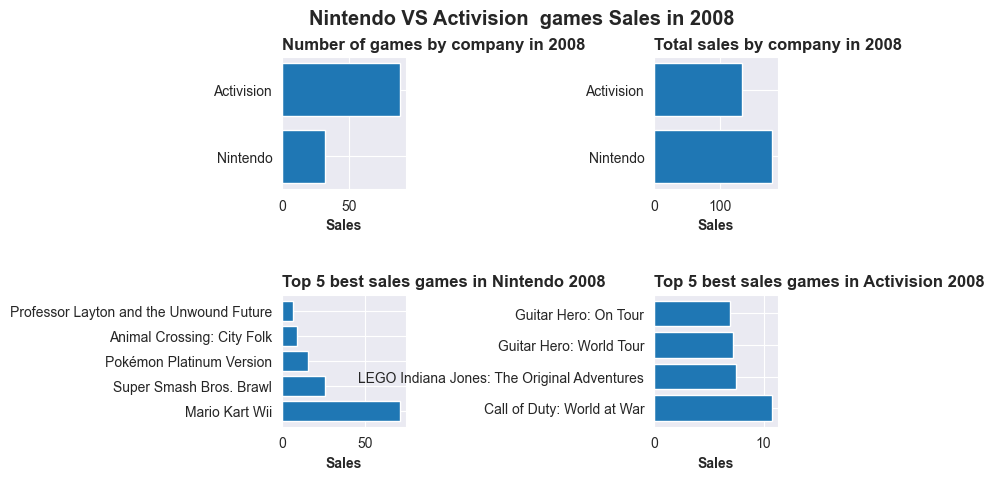

In [73]:
visualize_compare_pub(sales,'Nintendo','Activision',2008)

so here we compare the performance of two important publishers on the market they are Nintendo and Activision we previously 
saw that those companies appeared on top ten highest sales list more than 25 times (each time is a year) so they are strong
competents in the market here we take a look at their performance in climax sales year 2008 we notice that:
* the number of games released at 2008 by Activision is much larger than number of games released by Nintendo
* the Sales of Nintendo are Higher than sales of Activision
*the game with best sales for Nintendo is Mario 
* the game with best sales for Activision is Call of duty and we notice that it has smaller sales than mario game

<b>comparing number of publishers in 2016 and 2017:</b>

In [60]:
sales.query('Year_of_Release==2016')['Publisher'].unique()

array(['Electronic Arts', 'Nintendo', 'Sony Computer Entertainment',
       'Activision', 'Ubisoft', 'Take-Two Interactive', 'Hello Games',
       'Namco Bandai Games', 'Bethesda Softworks',
       'Microsoft Game Studios', 'Level 5', 'Square Enix', 'Capcom',
       'Warner Bros. Interactive Entertainment', 'Focus Home Interactive',
       'Konami Digital Entertainment', 'Codemasters', 'Atlus',
       '505 Games', 'Deep Silver', 'Tecmo Koei', 'GungHo', 'Sega',
       'Marvelous Interactive', 'Nippon Ichi Software', 'Kadokawa Games',
       'Telltale Games', 'Crytek', 'Unknown', 'PQube', 'CCP',
       'Nihon Falcom Corporation', 'Milestone S.r.l.', 'Insomniac Games',
       'Nippon Columbia', 'Aksys Games', 'Aqua Plus', 'Xseed Games',
       'FuRyu', 'Paradox Interactive', 'Broccoli', 'Tripwire Interactive',
       'MLB.com', 'Dusenberry Martin Racing', 'Happinet',
       'Milestone S.r.l', 'Rebellion Developments', 'D3Publisher',
       'Alternative Software', 'Astragon', 'Games Worksh

In [61]:
# now publishers of 2017
sales.query('Year_of_Release==2017')['Publisher'].unique()

array(['Sega', 'Idea Factory'], dtype=object)

so we can see that many publishers even strong ones disappeared from the market and only two companies were left in 2017
a huge difference indeed so why did all these companies disappear? and how is this releated with changes of sales? now
we will talk about sales values and their direct relation with other variable values in the market and how they impact these variables with their change

<b> What is The impact of  the changing  sales values on the market?</b>

It is important to mention the impact of low sales values on the market including: 
 * <b> First impact </b>the number of publishers decreases: with the falling of sales in 2016 the number of publishers has decreased very much and some of them have disappeared
from the market completely which means they never published any games even though some of them were always occuping
a rank in top ten highest sales list and the best example of this is nintendo the compnany has disappeared from the market
after 2016 but when sales were high the number of publisher was high too so now its time to see what is the relation
between sales values and the number of publishing companies



In [62]:
val=sales.groupby('Year_of_Release')['Total_Sales'].sum()
num=sales.groupby('Year_of_Release')['Publisher'].unique().apply(len)

In [63]:
rel={'Publisher_no':num,'Sales':val}
rel=pd.DataFrame(rel)
rel

,Publisher_no,Sales
Year_of_Release,,
1980.0,2,22.76
1981.0,14,71.45
1982.0,18,57.74
1983.0,4,33.59
1984.0,4,100.71
1985.0,6,107.89
1986.0,6,74.15
1987.0,8,43.44
1988.0,7,94.43


the previous table shows the number of publisher and sales each year now we use a scatter plot to view the relation between
sales values and number of publishers

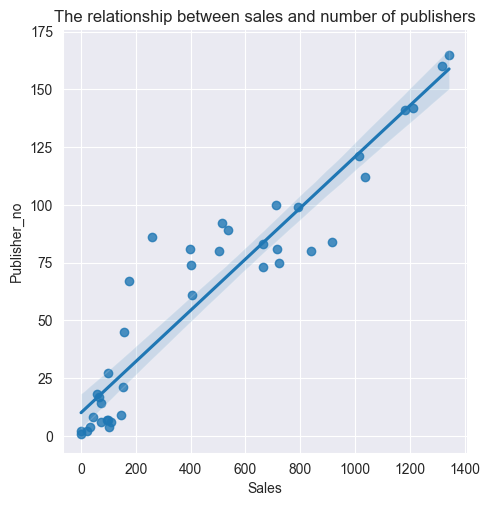

In [64]:
sns.lmplot(data=rel,x='Sales',y='Publisher_no')
plt.title('The relationship between sales and number of publishers')
plt.show()

from the above scatter plot we can see a clear linear relation between sales and number of publishers
and it seems that the number of publishers increases with sales increase and decreases with sales decrease
lets view how strong is this relation ship with pearson

In [65]:
rel.corr()

,Publisher_no,Sales
Publisher_no,1.000000,0.942729
Sales,0.942729,1.000000


we can see that pearson coeffient is eqaul to 0.9 which indicates a very strong positive linear correlation
so now we know why the number of publishers decreased very much after 2016 obviously it has decreased with sales decreasing
becuase it has a strong relation with sales

*  <b>Second Impact</b> the number of games released decreased: when sales were falling the decrease in number of publishers was not the only
impact in fact the decrease of sales and the decrease of publishers lead to the decreasing of number of games released
and that is because there is  a strong linear relationship between sales and number of games released
so when when were very in golden era between 2005 qnd 2011 the number of games was high and when sales are low
naturally the number of games released is going to be low lets view the relationship in the following scatter plot

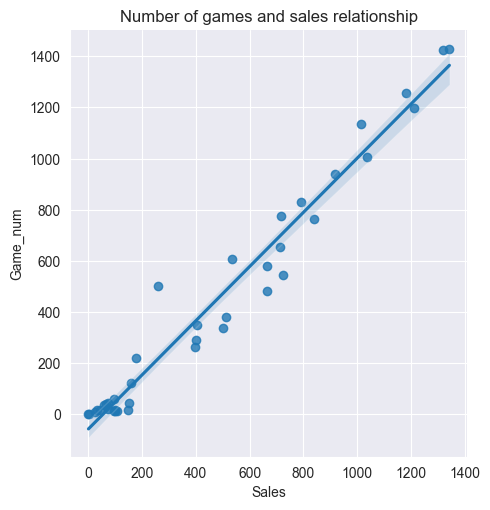

In [66]:
r1=sales.groupby('Year_of_Release')['Game_Name'].apply(len)
rel['Game_num']=r1
sns.lmplot(data=rel,x='Sales',y='Game_num')
plt.title('Number of games and sales relationship')
plt.show()

from the scatter plot above we can notice a very strong postive linear correlation between sales values and number 
of games released 

* <b>the third impact</b> of decreasing sales is the decrease in the variety of genres of games released 
and that is there is a relationship between sales and number of genres so when sales are high
there will be many genres and when they are low there wont be many genres

<b>   Conclusion : </b> we saw from previous data that sales of video games are decreasing each year and sales at 2020 which is
    the end year of the study has the second worst sales value in the history of the dataset after sales of 2017 and the number of publishers 
    decreased very much even strong competents like Nintendo disappeared from the market so we can say that <b> a future investment 
    in video games industry after 2020 might seem risky and dangerous wether the investor is a new found company or an old existing company</b>
    and it needs alot of planning and analysing of users preferences of games data in recent years from 2020 onward.
